In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import re

In [2]:
# 1. 불용어 파일 불러오기기
with open('./data/stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read()

In [3]:
# 2. 텍스트 파일 불러오기
with open('./data/방정환-꽃속의작은이.txt', 'r', encoding='utf-8') as file:
    content = file.read()

In [4]:
# 3. 문단 분리: 마침표, 물음표, 느낌표 뒤에서 줄바꿈을 감지하여 문단 분리
docs = re.split(r'(?<=[.!?])\s*\n+', content.strip())

# 문단 개수 확인 (문서가 제대로 나누어졌는지 확인)
print(f"분리된 문단 개수: {len(docs)}")

분리된 문단 개수: 50


In [5]:
# 4. 형태소 분석기 객체 생성
okt = Okt()

# 5. 명사, 형용사, 동사만 추출하고, 불용어를 제거한 후 문단 리스트를 생성
def extract_nouns_verbs_adjs(text):
    tagged = okt.pos(text) 
    return ' '.join([word for word, pos in tagged if pos in ['Noun', 'Verb', 'Adjective'] and word not in stopwords])

# 각 문단에서 명사, 형용사, 동사만 추출하여 새로운 리스트로 저장
processed_docs = [extract_nouns_verbs_adjs(doc) for doc in docs]

In [6]:
# 6. TF-IDF 계산을 위한 클래스 초기화 및 객체 생성
tfidf = TfidfVectorizer()

In [7]:
# 7. TF-IDF 계산
arr = tfidf.fit_transform(processed_docs).toarray()

In [8]:
# 8. TF-IDF 값을 DataFrame으로 변환
col = tfidf.get_feature_names_out()  # 고유 단어 리스트 (열 이름)
df = pd.DataFrame(arr, columns=col)
df

,가거라,가고,가고자,가기,가끔,가는,가는데,가늘게,가늘은,가다가,...,훨훨,흉악한,흐르고,흔들려,흘러서,흘리는가,흘리던,흘리면서,흩어져,희고
0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.245319,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.20227,0.000000,0.000000


In [9]:
# 9. 각 문서별로 TF-IDF 값이 높은 단어들 추출 및 정렬
top_n = 10  # 각 문서에서 상위 10개의 단어 선정

# 중요성이 높은 단어를 정렬해서 보기 좋게 출력하는 함수
def get_top_keywords_per_doc(df, top_n):
    top_keywords = {}
    for idx, row in df.iterrows():
        sorted_row = row.sort_values(ascending=False)  # TF-IDF 값 기준으로 내림차순 정렬
        top_keywords[f'문서 {idx + 1}'] = sorted_row.index[:top_n].tolist()  # 상위 top_n개의 단어 추출
    return top_keywords

# 각 문서에서 중요도가 높은 단어 추출
top_keywords = get_top_keywords_per_doc(df, top_n)

# 결과 출력
for doc, keywords in top_keywords.items():
    print(f"{doc}: {', '.join(keywords)}")  

문서 1: 나무, 있고, 드는, 함빡, 마당, 꽃밭, 작은이, 피어, 어여쁜, 장미꽃
문서 2: 오고, 소담, 발끝, 조그마한, 날개, 띄지, 아름답고, 않았, 어깨, 돋혀서
문서 3: 가득하고, 긋한, 비단, 사는데, 화판, 사면, 깨끗하게, 비치, 놓고, 향내
문서 4: 많고, 착해서, 놀고, 화롭, 따뜻한, 어여쁘고, 작은이의, 짓도, 향내, 세상
문서 5: 소리, 바라보았습니다, 쪼이고, 나와, 부르며, 부스럭, 가늘은, 깜짝, 따뜻하게, 앉아서
문서 6: 사람과, 오더니, 온다, 어라고, 잡고, 잘생긴, 손목, 앉았습니다, 정말, 와서
문서 7: 재미있게, 남녀, 어린, 어여쁜, 소리, 이야기, 작은이는, 있었습니다, 예쁜, 울었습니다
문서 8: 남자, 서로, 색시, 잡혀, 오늘, 되었습니다, 찾아온, 섭섭해, 욕심, 친하게
문서 9: 하니, 암만, 이별, 되었다, 탄식, 꼼짝, 두고, 남자, 하였습니다, 악한
문서 10: 눈물, 색시, 성하게, 만나서, 맞추더니, 울었, 꺾어서, 만날, 가려고, 맞추었
문서 11: 훌쩍, 주는, 듣고, 날아서, 시가, 앉았습니다, 남자에게, 들어가, 있던, 이야기
문서 12: 가슴, 자꾸, 남자, 가거라, 앉은, 뛰는지, 벌럭벌럭, 그러는, 양복, 있거라
문서 13: 지난, 조용하여졌습니다, 진정, 모양, 가슴, 가거라, 울었, 외우고, 욕심, 울고만
문서 14: 대고, 입술, 남자, 소나무, 걸아가면서, 빼어, 찌그러질, 옮아, 뻔하였습니다, 뜨거웠으므로
문서 15: 연해, 어둔, 걸어, 깊이, 들어갔습니다, 맞추면서, 자꾸, 남자, 색시, 웃었습니다
문서 16: 생긴, 사납게, 남자, 들더니, 별안간, 베어, 기르는, 달려들었, 번개, 맞추는
문서 17: 없앴으, 잊어, 버리면, 시원하다, 애가, 중얼거렸습니다, 하는데, 파묻어, 있을, 수가
문서 18: 모자, 몹시, 머리, 갔습니다, 갑갑하였으나, 집어, 모르고, 참고, 뭉쳐서, 캄캄하고
문서 19: 들고, 고개, 악한, 얼굴, 색시, 남자, 이었겠습니까, 돌

In [10]:
# 고어, 신조어 등은 토큰화가 어려움; 수기로 하나하나 사용자정의사전으로 추가X -> 사전학습이 안되어있는(정형화된 문법구조가 학습되어있지 않은) 모델로 토큰화 진행 : 내일 배울 것

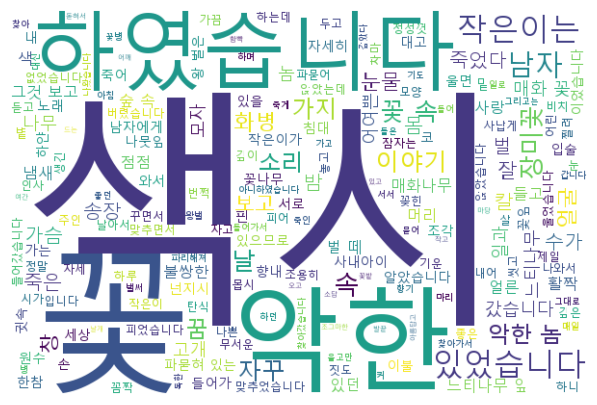

In [11]:
# 10. 시각화; 워드 클라우드 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = 'C:/Windows/Fonts/malgun.ttf'

# 문서 리스트를 하나의 텍스트로 연결
text = " ".join([" ".join(doc.split()) for doc in processed_docs])

# TF-IDF 값을 반영한 워드 클라우드 생성
wc = WordCloud(width=600, height=400, background_color='white', font_path=font_path, random_state=12345).generate(text)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
